<a href="https://colab.research.google.com/github/Szczureczek1983/Repozytorium2/blob/main/projekt_koncowy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle

In [2]:
 from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"andrzejsz","key":"199987e5bfe79b88f6732454555a1763"}'}

In [3]:
 ! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
 ! kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
kaggleashwin/population-dataset                                World Population by Countries Dataset (1960-2021)    69KB  2022-08-31 05:30:26           1279         62  1.0              
iamsouravbanerjee/house-rent-prediction-dataset                House Rent Prediction Dataset                        82KB  2022-08-20 13:49:03           9417        252  1.0              
iamsouravbanerjee/world-population-dataset                     World Population Dataset                             17KB  2022-08-31 11:20:04           3190        116  1.0              
sveta151/tiktok-popular-songs-2021                             Ti

In [7]:
!kaggle competitions download -c hubmap-organ-segmentation

100% 5.78G/5.78G [01:00<00:00, 152MB/s]
100% 5.78G/5.78G [01:00<00:00, 103MB/s]


In [8]:
!mkdir organs

In [9]:
! unzip hubmap-organ-segmentation.zip -d organs

Archive:  hubmap-organ-segmentation.zip
  inflating: organs/sample_submission.csv  
  inflating: organs/test.csv         
  inflating: organs/test_images/10078.tiff  
  inflating: organs/train.csv        
  inflating: organs/train_annotations/10044.json  
  inflating: organs/train_annotations/10274.json  
  inflating: organs/train_annotations/10392.json  
  inflating: organs/train_annotations/10488.json  
  inflating: organs/train_annotations/10610.json  
  inflating: organs/train_annotations/10611.json  
  inflating: organs/train_annotations/10651.json  
  inflating: organs/train_annotations/10666.json  
  inflating: organs/train_annotations/10703.json  
  inflating: organs/train_annotations/10892.json  
  inflating: organs/train_annotations/10912.json  
  inflating: organs/train_annotations/10971.json  
  inflating: organs/train_annotations/10992.json  
  inflating: organs/train_annotations/11064.json  
  inflating: organs/train_annotations/1123.json  
  inflating: organs/train_annot

In [17]:
!mkdir organs/RGB_Pan

mkdir: cannot create directory ‘organs/RGB_Pan’: No such file or directory


In [21]:

from PIL import Image
import glob

for name in glob.glob('/content/organs/train_images/*.tif'):
    im = Image.open(name)
    name = str(name).rstrip(".tif")
    im.save(name + '.jpg', 'JPEG')

for name in glob.glob('/content/organs/train_images/*.tiff'):
    im = Image.open(name)
    name = str(name).rstrip(".tiff")
    im.save(name + '.jpg', 'JPEG')

print("Conversion from tif/tiff to jpg completed!")

Conversion from tif/tiff to jpg completed!


In [22]:
import glob
import os
import shutil

src_folder = r"/content/organs/train_images/"
dst_folder = r"/content/organs/RGB_Pan/"

# Search files with .txt extension in source directory
pattern = "/*.jpg"
files = glob.glob(src_folder + pattern)

# move the files with txt extension
for file in files:
    # extract file name form file path
    file_name = os.path.basename(file)
    shutil.move(file, dst_folder + file_name)
    print('Moved:', file)

Moved: /content/organs/train_images/10610.jpg
Moved: /content/organs/train_images/27781.jpg
Moved: /content/organs/train_images/19569.jpg
Moved: /content/organs/train_images/2279.jpg
Moved: /content/organs/train_images/29213.jpg
Moved: /content/organs/train_images/12026.jpg
Moved: /content/organs/train_images/19533.jpg
Moved: /content/organs/train_images/15124.jpg
Moved: /content/organs/train_images/6021.jpg
Moved: /content/organs/train_images/18449.jpg
Moved: /content/organs/train_images/12476.jpg
Moved: /content/organs/train_images/31571.jpg
Moved: /content/organs/train_images/29296.jpg
Moved: /content/organs/train_images/30876.jpg
Moved: /content/organs/train_images/10392.jpg
Moved: /content/organs/train_images/16728.jpg
Moved: /content/organs/train_images/4066.jpg
Moved: /content/organs/train_images/4265.jpg
Moved: /content/organs/train_images/5583.jpg
Moved: /content/organs/train_images/7706.jpg
Moved: /content/organs/train_images/9777.jpg
Moved: /content/organs/train_images/1184.

In [23]:
!pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.3 MB 1.3 MB/s 


In [24]:
import rasterio as rio
from rasterio.plot import show
from sklearn import cluster
import matplotlib.pyplot as plt
import numpy as np

In [25]:
raster = rio.open("/content/drive/MyDrive/5832.tiff")
print(raster.meta)

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 3000, 'height': 3000, 'count': 3, 'crs': None, 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0)}


/usr/local/lib/python3.7/dist-packages/rasterio/__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [26]:
large_arr = raster.read() # read the opened image
vmin, vmax = np.nanpercentile(large_arr, (5,95))  # 5-95% contrast stretch

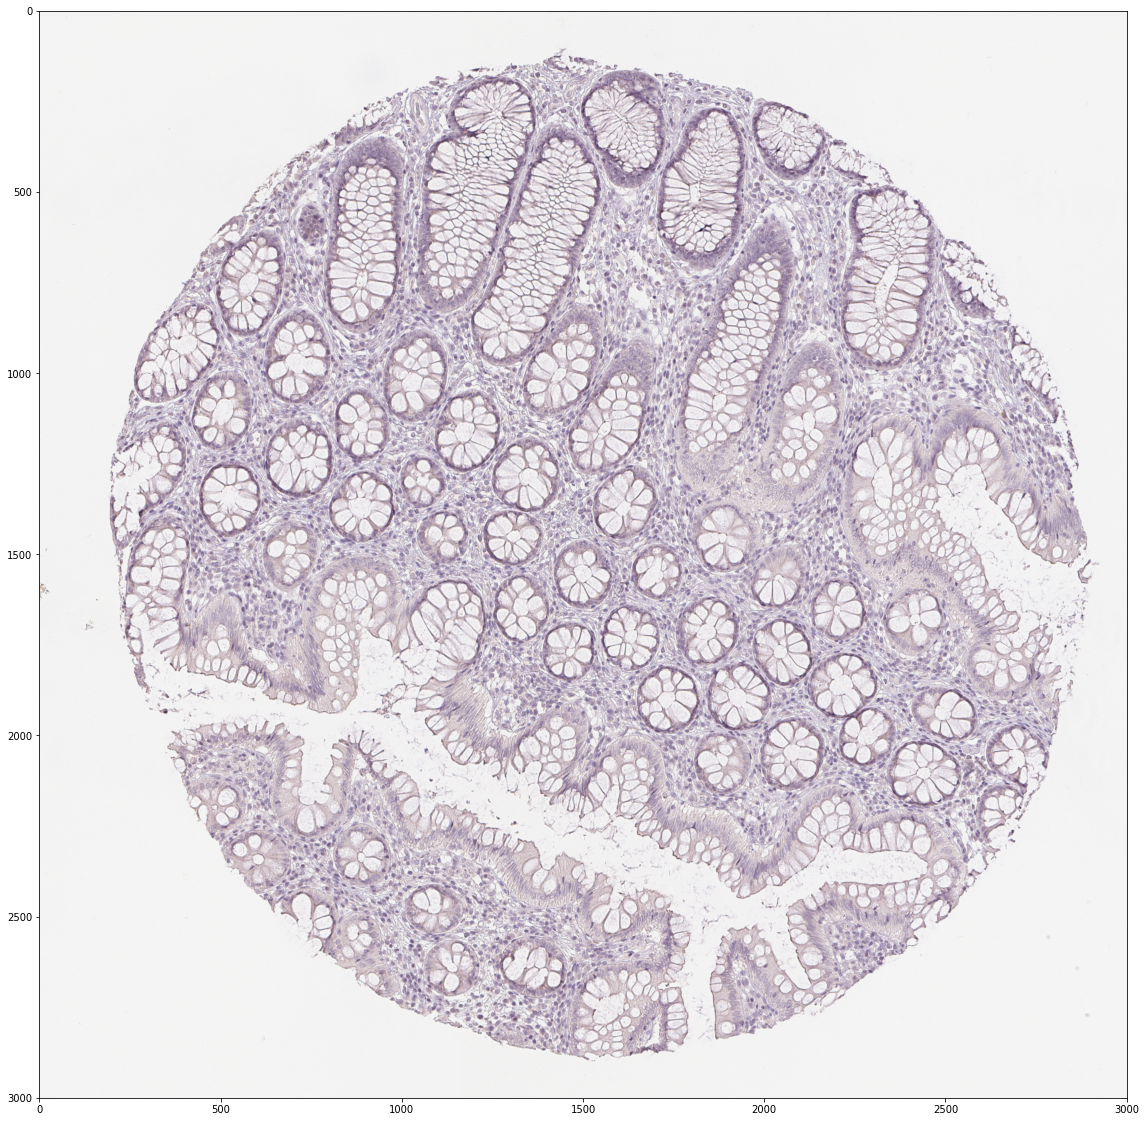

In [27]:
plt.figure(figsize=[20,20])
show(raster, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

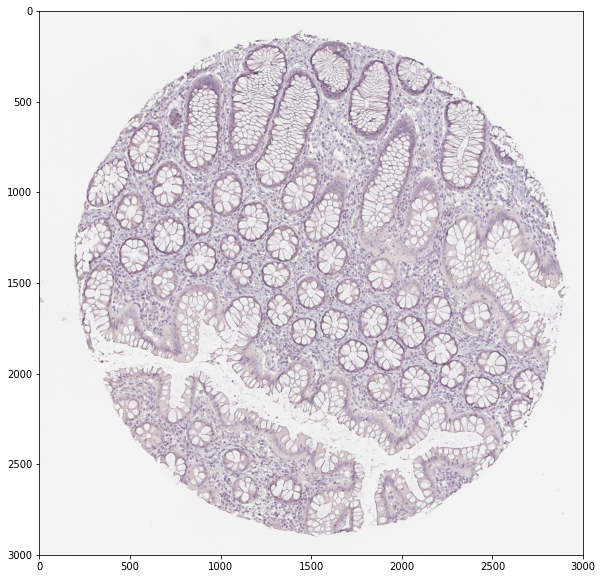

In [28]:
im_arr = raster.read() # read the opened image
vmin, vmax = np.nanpercentile(im_arr, (5,95))  # 5-95% contrast stretch# show the enhanced image
plt.figure(figsize=[10,10])
show(raster, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [29]:
imgxyb = np.empty((raster.height, raster.width, raster.count), raster.meta['dtype'])# loop through the raster's bands to fill the empty array
for band in range(imgxyb.shape[2]):
    imgxyb[:,:,band] = raster.read(band+1)
print(imgxyb.shape)

(3000, 3000, 3)


In [30]:
import cv2
from google.colab.patches import cv2_imshow

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

scale_percent = 10 # percent of original size
width = int(imgxyb.shape[1] * scale_percent / 100)
height = int(imgxyb.shape[0] * scale_percent / 100)
dim = (width, height)
 
# resize image
resized_imgxyb = cv2.resize(imgxyb, dim, interpolation = cv2.INTER_AREA)
wrong_img_resize = cv2.resize(imgxyb, (400, 400), interpolation = cv2.INTER_AREA)
resized_imgxyb.shape

(300, 300, 3)

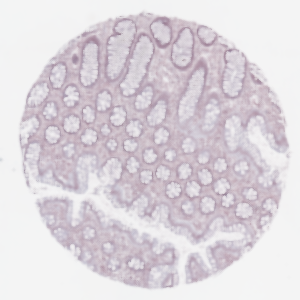

-1

In [31]:
from google.colab.patches import cv2_imshow
bilateral_filtered_image = cv2.bilateralFilter(resized_imgxyb, 5, 175, 175)
Bilateral = cv2_imshow(bilateral_filtered_image)
cv2.waitKey(0)

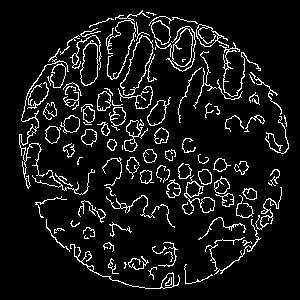

-1

In [32]:
edge_detected_image = cv2.Canny(bilateral_filtered_image, 80, 200)
Edge = cv2_imshow(edge_detected_image)
cv2.waitKey(0)

In [33]:
contours, hierarchy = cv2.findContours(edge_detected_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contour_list = []
for contour in contours:
    approx = cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)
    area = cv2.contourArea(contour)
    if ((len(approx) > 5) & (area > 10) ):
        contour_list.append(contour)

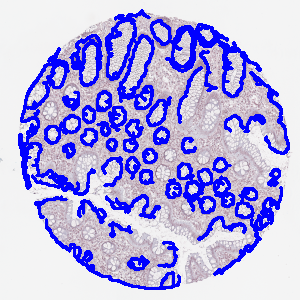

-1

In [34]:
img_c = cv2.drawContours(resized_imgxyb, contour_list,  -1, (255,0,0), 2)
circles = cv2_imshow(img_c)
cv2.waitKey(0)

In [35]:
print(hierarchy)

[[[  1  -1  -1  -1]
  [  2   0  -1  -1]
  [  3   1  -1  -1]
  [  4   2  -1  -1]
  [  5   3  -1  -1]
  [  6   4  -1  -1]
  [  7   5  -1  -1]
  [  8   6  -1  -1]
  [ 12   7   9  -1]
  [ 11  -1  10   8]
  [ -1  -1  -1   9]
  [ -1   9  -1   8]
  [ 13   8  -1  -1]
  [ 14  12  -1  -1]
  [ 15  13  -1  -1]
  [ 16  14  -1  -1]
  [ 17  15  -1  -1]
  [ 18  16  -1  -1]
  [ 19  17  -1  -1]
  [ 20  18  -1  -1]
  [ 21  19  -1  -1]
  [ 22  20  -1  -1]
  [ 23  21  -1  -1]
  [ 24  22  -1  -1]
  [ 25  23  -1  -1]
  [ 26  24  -1  -1]
  [ 27  25  -1  -1]
  [ 28  26  -1  -1]
  [ 29  27  -1  -1]
  [ 30  28  -1  -1]
  [ 32  29  31  -1]
  [ -1  -1  -1  30]
  [ 34  30  33  -1]
  [ -1  -1  -1  32]
  [ 36  32  35  -1]
  [ -1  -1  -1  34]
  [ 37  34  -1  -1]
  [ 38  36  -1  -1]
  [ 39  37  -1  -1]
  [ 41  38  40  -1]
  [ -1  -1  -1  39]
  [ 44  39  42  -1]
  [ 43  -1  -1  41]
  [ -1  42  -1  41]
  [ 45  41  -1  -1]
  [ 47  44  46  -1]
  [ -1  -1  -1  45]
  [ 48  45  -1  -1]
  [ 50  47  49  -1]
  [ -1  -1  -1  48]


In [36]:
filtered_contours = []
has_a_child = []

for contour, h in zip(contours, hierarchy[0]):
  if h[3] == -1:
    filtered_contours.append(contour)
    if h[2] != -1:
      has_a_child.append(1)
    else:
      has_a_child.append(0)

len(contours)


148

In [37]:
features_list = []

#obliczamy momenty
for contour, childs in zip(filtered_contours, has_a_child):
  print(contour)
  moments = cv2.moments(contour)
  hu_moments = cv2.HuMoments(moments)

#obliczmy okrągłóść
  contour_area = cv2.contourArea(contour)
  arc_length = cv2.arcLength(contour, True)
  if arc_length > 0:
    features = {x: hu[0] for x, hu in enumerate(hu_moments)}
    features['circularity'] = 4 * 3.14 * contour_area / arc_length**2   #wzór do obliczania okrągłości
    features['has_child'] = childs
    features_list.append(features)

[[[153 267]]

 [[152 268]]

 [[151 268]]

 [[151 269]]

 [[149 271]]

 [[148 270]]

 [[150 272]]

 [[150 274]]

 [[149 275]]

 [[150 274]]

 [[151 274]]

 [[153 276]]

 [[153 279]]

 [[153 275]]

 [[152 274]]

 [[151 274]]

 [[150 273]]

 [[150 270]]

 [[153 267]]

 [[155 267]]

 [[156 268]]

 [[156 269]]

 [[156 267]]]
[[[185 264]]

 [[185 265]]

 [[184 266]]

 [[185 267]]

 [[184 268]]

 [[184 269]]

 [[185 270]]

 [[185 283]]

 [[191 283]]

 [[192 282]]

 [[195 282]]

 [[196 281]]

 [[200 281]]

 [[201 280]]

 [[202 280]]

 [[203 279]]

 [[204 279]]

 [[205 278]]

 [[207 278]]

 [[210 275]]

 [[212 275]]

 [[211 274]]

 [[209 276]]

 [[208 276]]

 [[206 278]]

 [[205 278]]

 [[204 279]]

 [[202 279]]

 [[200 281]]

 [[199 281]]

 [[197 279]]

 [[197 280]]

 [[195 282]]

 [[192 282]]

 [[191 283]]

 [[186 283]]

 [[185 282]]

 [[185 270]]

 [[184 269]]

 [[184 268]]

 [[185 267]]

 [[184 266]]

 [[186 264]]]
[[[124 262]]

 [[124 263]]

 [[125 264]]

 [[125 266]]

 [[124 267]]

 [[124

In [38]:
import pandas as pd

pd.options.display.float_format = "{:,.3f}".format
df = pd.DataFrame(features_list)
df

0       1         2         3             4          5            6  \
0    2.878   1.730    17.676     9.811       128.670      7.147      -11.756   
1   10.647  34.336   564.996   867.725   508,295.831  2,317.891  332,829.140   
2    1.000   0.784     0.494     0.335         0.136      0.274       -0.008   
3    2.094   1.835     0.243     0.038         0.000      0.049       -0.004   
4    2.399   1.041     0.267     0.060        -0.005      0.030       -0.005   
..     ...     ...       ...       ...           ...        ...          ...   
106  0.179   0.006     0.000     0.000        -0.000     -0.000       -0.000   
107 10.970 119.248    24.656    21.444       492.988    229.813        8.762   
108 23.401 531.592 2,561.654 2,207.202 5,247,391.988 48,713.532 -100,585.815   
109  2.836   7.484     3.579     3.028         9.963      8.222        0.257   
110 11.385  71.399   145.763     8.375      -112.944    -56.690     -269.948   

     circularity  has_child  
0          0.023          0  
1          0.008          0  
2          0.194          0  
3          0.018          0  
4          0.013          0  
..           ...        ...  
106        0.730          1  
107        0.025          0  
108        0.008          0  
109        0.065          0  
110        0.002          0  

[111 rows x 9 columns]

In [39]:
from sklearn.cluster import KMeans
import numpy as np

from sklearn import preprocessing

x = df.values #returns a numpy array
normalizer = preprocessing.Normalizer()
x_scaled = normalizer.fit_transform(x)
df = pd.DataFrame(x_scaled)

kmeans = KMeans(n_clusters=5, random_state=0).fit(df)
print(kmeans.labels_)

colors = [(255,0,0), (255,255,0), (255,0,255), (0,255,0), (0,255,255), (0,0,255)]
for contour, label in zip(filtered_contours, kmeans.labels_):
  classified = cv2.drawContours(resized_imgxyb, [contour], 0, colors[label], 3)
  
print(df)

[1 3 0 0 0 1 1 1 1 4 0 0 1 0 0 4 1 0 4 1 3 0 1 3 1 4 0 1 2 2 0 0 0 2 2 0 2
 0 2 1 3 3 0 1 2 3 1 1 1 1 2 4 0 2 0 1 2 1 0 2 2 0 2 0 1 1 2 1 2 2 0 2 1 3
 3 0 2 0 1 2 0 1 4 1 3 1 3 0 3 1 1 4 1 0 1 4 4 4 2 3 1 0 1 2 2 0 2 1 1 1 4]
        0     1     2     3      4      5      6     7     8
0   0.022 0.013 0.135 0.075  0.982  0.055 -0.090 0.000 0.000
1   0.000 0.000 0.001 0.001  0.837  0.004  0.548 0.000 0.000
2   0.690 0.541 0.341 0.231  0.094  0.189 -0.006 0.134 0.000
3   0.749 0.656 0.087 0.014  0.000  0.018 -0.001 0.006 0.000
4   0.912 0.396 0.101 0.023 -0.002  0.012 -0.002 0.005 0.000
..    ...   ...   ...   ...    ...    ...    ...   ...   ...
106 0.143 0.005 0.000 0.000 -0.000 -0.000 -0.000 0.584 0.799
107 0.020 0.214 0.044 0.038  0.884  0.412  0.016 0.000 0.000
108 0.000 0.000 0.000 0.000  1.000  0.009 -0.019 0.000 0.000
109 0.178 0.471 0.225 0.190  0.626  0.517  0.016 0.004 0.000
110 0.034 0.210 0.429 0.025 -0.332 -0.167 -0.795 0.000 0.000

[111 rows x 9 columns]


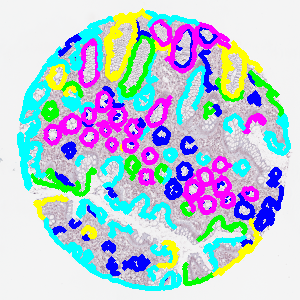

In [40]:
cv2_imshow(classified)

In [ ]:
Dir = '/content/organs/RGB_Pan'